# Parsing Data 
All data is assumed that the file is unziped, and it is ready processed. 

In [1]:
filename_traindata = "./train-images-idx3-ubyte"
filename_label = "./train-labels-idx1-ubyte"

In [2]:
import PIL as pil
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

############################################################
# helper functions
############################################################
def byte_int(ubyte):
    # convert a bytes object to an int
    # return int
    return int.from_bytes(ubyte, byteorder='big', signed=False)

def read_int(file, nbyte):
    # read nbyte bytes from a file 
    # return an int
    return byte_int(file.read(nbyte))

def read_array(file, nbyte, nelement):
    # read nbyte bytes for nelement numbers from a file object
    # return a list of nelement integers 
    arr = []
    for _ in range(nelement):
        element = read_int(file, nbyte)
        arr.append(element)
    return arr

def read_narray(file, num, row, col, nbyte):
    # read nbyte bytes for num arrays from a file object
    # return a 2D row x column list of nelement integers 
    images = []
    for _ in range(num):
        array = read_array(file, nbyte, row * col)
        images.append(array)
    return images

############################################################
# exported functions
############################################################
def read_images(filename):
    # read the idx3/image files
    # return a dataframe object
    with open(filename, "rb") as ftraindata:
        magic_number = read_int(ftraindata, 4)
        if magic_number != 2051:
            raise IOError("Error reading a wrong file %s with this magic number %d" 
                          % (filename, magic_number))

        item_num = read_int(ftraindata, 4)
        item_num = 1
        row_num = read_int(ftraindata, 4)
        col_num = read_int(ftraindata, 4)
        images = read_narray(ftraindata, item_num, 1, row_num * col_num, 1)
    return pd.DataFrame(images, dtype=np.uint8)

def read_labels(filename):
    # idx1 files (label files)
    with open(filename, "rb") as fdata:
        magic_number = read_int(fdata, 4)
        if magic_number != 2049:
            raise IOError("Error reading a wrong file %s with this magic number %d" 
                          % (filename, magic_number))

        nitem = read_int(fdata, 4)
        labels = read_array(fdata, 1, nitem)
    return pd.DataFrame({'label': labels}, dtype=np.uint8)

def write_csv(df, filename):
    # write the dataframe to the csv file, and create an image id
    df.to_csv(filename, index=True, index_label="id")

In [3]:
# test the type of each row
df_imgs = read_images(filename_traindata)
df_imgs.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# test the type of each column
df_imgs.dtypes

0      uint8
1      uint8
2      uint8
3      uint8
4      uint8
5      uint8
6      uint8
7      uint8
8      uint8
9      uint8
10     uint8
11     uint8
12     uint8
13     uint8
14     uint8
15     uint8
16     uint8
17     uint8
18     uint8
19     uint8
20     uint8
21     uint8
22     uint8
23     uint8
24     uint8
25     uint8
26     uint8
27     uint8
28     uint8
29     uint8
       ...  
754    uint8
755    uint8
756    uint8
757    uint8
758    uint8
759    uint8
760    uint8
761    uint8
762    uint8
763    uint8
764    uint8
765    uint8
766    uint8
767    uint8
768    uint8
769    uint8
770    uint8
771    uint8
772    uint8
773    uint8
774    uint8
775    uint8
776    uint8
777    uint8
778    uint8
779    uint8
780    uint8
781    uint8
782    uint8
783    uint8
Length: 784, dtype: object

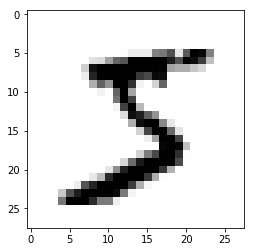

In [5]:
# test function read_array
imagefile = open(filename_traindata, "rb")
imagefile.read(16)
array = read_array(imagefile, 1, 28*28)
imagefile.close()

img = np.array(array)
img = img.reshape((28, 28))
img.shape
plt.imshow(img, cmap='binary')

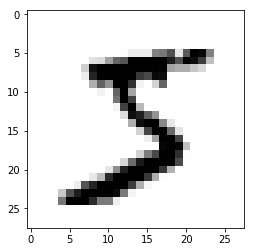

In [6]:
# test_function read_narray
imagefile = open(filename_traindata, "rb")
imagefile.read(16)
arrays = read_narray(imagefile, 2, 1, 28 * 28, 1)
imagefile.close()

img = np.array(arrays)
img = img.reshape((2, 28, 28))
img.shape
plt.imshow(img[0, :, :], cmap='binary')

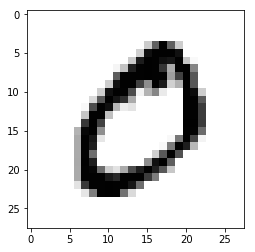

In [7]:
plt.imshow(img[1, :, :], cmap='binary')

In [8]:
# test labels
df_labels = read_labels(filename_label)
df_labels.head()

,label
0,5
1,0
2,4
3,1
4,9


In [9]:
# show the type of the labels
df_labels.dtypes

label    uint8
dtype: object

In [10]:
# test the type of label after merging with the images
import copy
df_imgc = copy.deepcopy(df_imgs)
df_imgc.dtypes
df_imgc['label'] = df_labels['label']
df_imgc.dtypes

0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
5        uint8
6        uint8
7        uint8
8        uint8
9        uint8
10       uint8
11       uint8
12       uint8
13       uint8
14       uint8
15       uint8
16       uint8
17       uint8
18       uint8
19       uint8
20       uint8
21       uint8
22       uint8
23       uint8
24       uint8
25       uint8
26       uint8
27       uint8
28       uint8
29       uint8
         ...  
755      uint8
756      uint8
757      uint8
758      uint8
759      uint8
760      uint8
761      uint8
762      uint8
763      uint8
764      uint8
765      uint8
766      uint8
767      uint8
768      uint8
769      uint8
770      uint8
771      uint8
772      uint8
773      uint8
774      uint8
775      uint8
776      uint8
777      uint8
778      uint8
779      uint8
780      uint8
781      uint8
782      uint8
783      uint8
label    uint8
Length: 785, dtype: object

In [11]:
write_csv(df_imgc, "traindata.csv")

In [12]:
df_train = pd.read_csv("./traindata.csv", dtype=np.uint8)
df_train.head()

,id,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [13]:
df_train.dtypes

id       uint8
0        uint8
1        uint8
2        uint8
3        uint8
4        uint8
5        uint8
6        uint8
7        uint8
8        uint8
9        uint8
10       uint8
11       uint8
12       uint8
13       uint8
14       uint8
15       uint8
16       uint8
17       uint8
18       uint8
19       uint8
20       uint8
21       uint8
22       uint8
23       uint8
24       uint8
25       uint8
26       uint8
27       uint8
28       uint8
         ...  
755      uint8
756      uint8
757      uint8
758      uint8
759      uint8
760      uint8
761      uint8
762      uint8
763      uint8
764      uint8
765      uint8
766      uint8
767      uint8
768      uint8
769      uint8
770      uint8
771      uint8
772      uint8
773      uint8
774      uint8
775      uint8
776      uint8
777      uint8
778      uint8
779      uint8
780      uint8
781      uint8
782      uint8
783      uint8
label    uint8
Length: 786, dtype: object

In [14]:
df_train.shape

(1, 786)

In [15]:
# Side Note: DO NOT USE df[df.columns.difference(['b'])]
# it will sort the columns name.

# Example how to plot images
df_imgs = df_train.drop(['label', 'id'], axis=1)
df_imgs
np_img = np.array(df_imgs)

np_img = np_img.reshape((28, 28))
np_img.shape

(28, 28)

In [16]:
img = pil.Image.fromarray(np_img, mode='L')
img

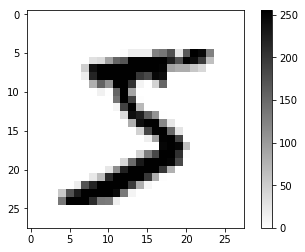

In [17]:
plt.imshow(np_img, cmap='binary')
plt.colorbar()
# plt.savefig("test_np.png")